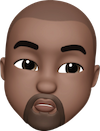
# Project: Predicting Calories Burnt During a Workout Session⭐

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Calories Prediction Dataset.csv")

In [3]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193,86,11,92,40.4,45
14996,17212577,female,27,165,65,6,85,39.2,23
14997,17271188,female,43,159,58,16,90,40.1,75
14998,18643037,male,78,193,97,2,84,38.3,11


## Data Understanding 👇

In [4]:
df.shape

(15000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
df.drop_duplicates()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193,86,11,92,40.4,45
14996,17212577,female,27,165,65,6,85,39.2,23
14997,17271188,female,43,159,58,16,90,40.1,75
14998,18643037,male,78,193,97,2,84,38.3,11


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isna().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [9]:
df.dtypes

User_ID         int64
Gender         object
Age             int64
Height          int64
Weight          int64
Duration        int64
Heart_Rate      int64
Body_Temp     float64
Calories        int64
dtype: object

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,15000.0,1.497736e+07,2.872851e+06,10001159.0,12474190.75,14997285.0,17449278.75,19999647.0
Age,15000.0,4.278980e+01,1.698026e+01,20.0,28.00,39.0,56.00,79.0
Height,15000.0,1.744651e+02,1.425811e+01,123.0,164.00,175.0,185.00,222.0
Weight,15000.0,7.496687e+01,1.503566e+01,36.0,63.00,74.0,87.00,132.0
Duration,15000.0,1.553060e+01,8.319203e+00,1.0,8.00,16.0,23.00,30.0
Heart_Rate,15000.0,9.551853e+01,9.583328e+00,67.0,88.00,96.0,103.00,128.0
Body_Temp,15000.0,4.002545e+01,7.792299e-01,37.1,39.60,40.2,40.60,41.5
Calories,15000.0,8.953953e+01,6.245698e+01,1.0,35.00,79.0,138.00,314.0


# Exploratory Data Analysis👇

In [11]:
df = df.drop(columns=["User_ID"], axis=1)
df

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190,94,29,105,40.8,231
1,female,20,166,60,14,94,40.3,66
2,male,69,179,79,5,88,38.7,26
3,female,34,179,71,13,100,40.5,71
4,female,27,154,58,10,81,39.8,35
...,...,...,...,...,...,...,...,...
14995,female,20,193,86,11,92,40.4,45
14996,female,27,165,65,6,85,39.2,23
14997,female,43,159,58,16,90,40.1,75
14998,male,78,193,97,2,84,38.3,11


##### Seperating a the columns into their different data types👇

In [12]:
num_col = df.select_dtypes(include=np.number).columns

In [13]:
num_col

Index(['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp',
       'Calories'],
      dtype='object')

In [14]:
cat_col = df.select_dtypes(["object"]).columns

In [15]:
cat_col

Index(['Gender'], dtype='object')

## Visualization for Distributions and Outliers👇

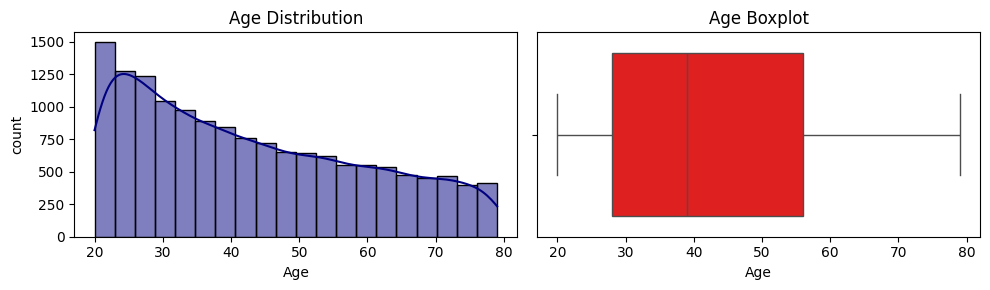

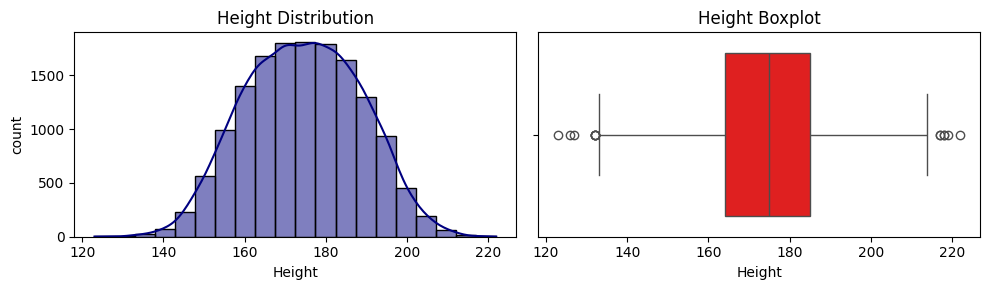

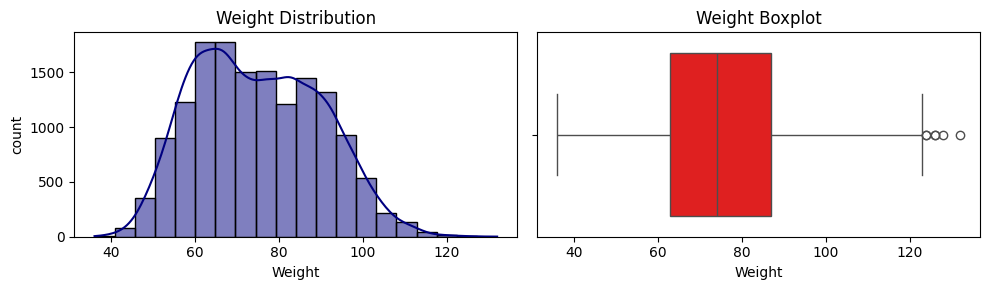

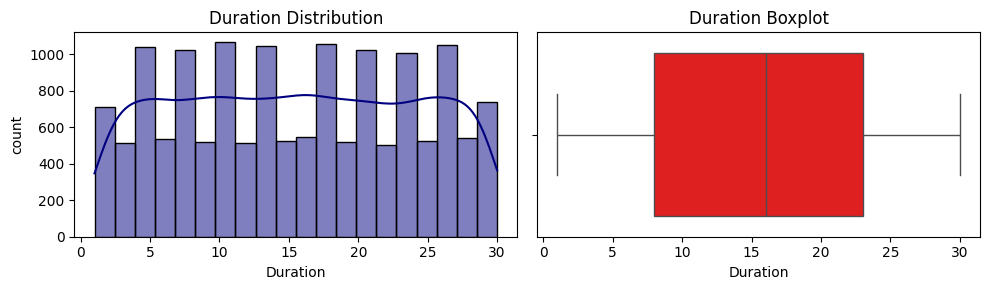

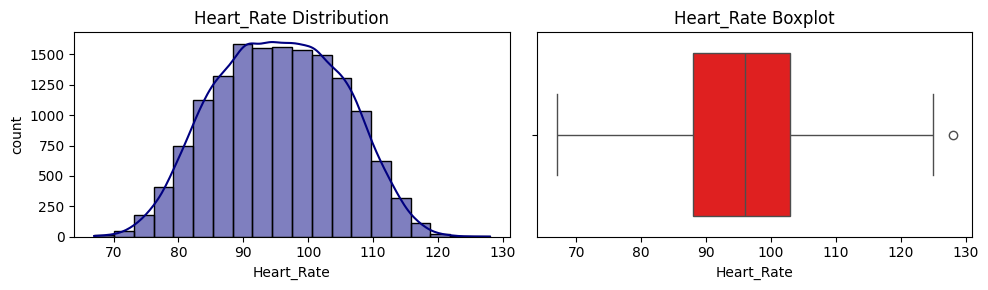

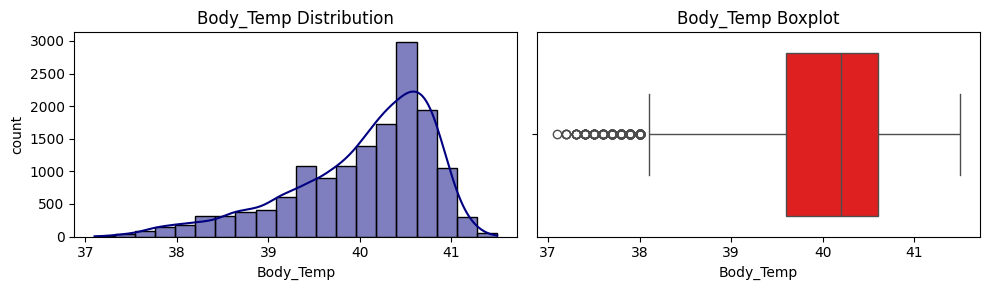

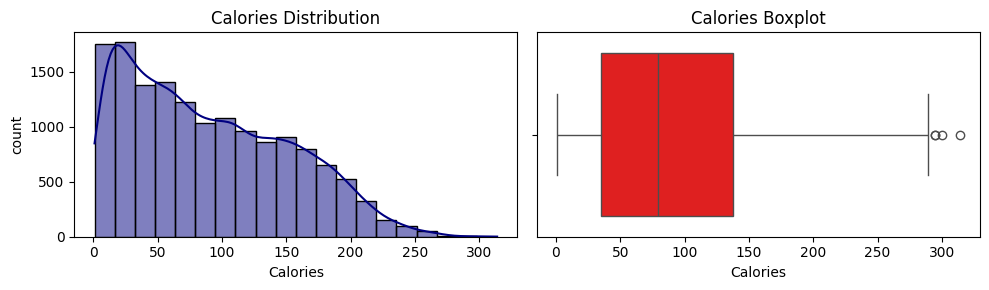

In [16]:
for col in num_col:
    plt.figure(figsize=(10, 3))
    plt.subplot(1, 2, 1)
    sns.histplot(data=df[col], bins=20, kde=True, color="navy")
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("count")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color="red")
    plt.xlabel(col)
    plt.title(f"{col} Boxplot")
    plt.tight_layout()
plt.show()
    

## Featuring Engineering👇

In [17]:
df

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190,94,29,105,40.8,231
1,female,20,166,60,14,94,40.3,66
2,male,69,179,79,5,88,38.7,26
3,female,34,179,71,13,100,40.5,71
4,female,27,154,58,10,81,39.8,35
...,...,...,...,...,...,...,...,...
14995,female,20,193,86,11,92,40.4,45
14996,female,27,165,65,6,85,39.2,23
14997,female,43,159,58,16,90,40.1,75
14998,male,78,193,97,2,84,38.3,11


In [18]:
df["Age"].max() #Max age = 79
df["Age"].min() #Max age = 20
df["Weight"].max()

np.int64(132)

#### Some sourced information on the classification of weight gain and weight loss ranges from 0 to 132 kg.👇

In [19]:
# Here’s a general classification of weight gain and weight loss ranges from 0 to 132 kg, assuming weight changes are based on health, fitness, and medical considerations:

# Weight Ranges & Goals
# Weight Range (kg)	Common Goal	Reason
# 0 – 20 kg	Weight Gain	Infants and young children naturally gain weight for growth.
# 20 – 40 kg	Weight Gain	Typically applies to children, teenagers, or underweight individuals.
# 40 – 50 kg	Weight Gain or Maintenance	Weight gain may be needed for underweight adults.
# 50 – 70 kg	Weight Gain or Loss	Weight loss for those with excess fat; weight gain for athletes or lean individuals.
# 70 – 90 kg	Weight Loss	Often a weight loss range for people seeking to reduce fat.
# 90 – 110 kg	Weight Loss	Common range for overweight or obese individuals aiming for a healthier weight.
# 110 – 132 kg	Weight Loss	Typically advised for health improvement, joint relief, and disease prevention.
# Summary
# Weight gain is generally necessary in the lower weight ranges (<50 kg) for underweight individuals.
# Weight loss is common for people above 70 kg, depending on their height, muscle mass, and health status.

<!-- Here’s a general classification of weight gain and weight loss ranges from 0 to 132 kg, assuming weight changes are based on health, fitness, and medical considerations:

Weight Ranges & Goals
Weight Range (kg)	Common Goal	Reason
0 – 20 kg	Weight Gain	Infants and young children naturally gain weight for growth.
20 – 40 kg	Weight Gain	Typically applies to children, teenagers, or underweight individuals.
40 – 50 kg	Weight Gain or Maintenance	Weight gain may be needed for underweight adults.
50 – 70 kg	Weight Gain or Loss	Weight loss for those with excess fat; weight gain for athletes or lean individuals.
70 – 90 kg	Weight Loss	Often a weight loss range for people seeking to reduce fat.
90 – 110 kg	Weight Loss	Common range for overweight or obese individuals aiming for a healthier weight.
110 – 132 kg	Weight Loss	Typically advised for health improvement, joint relief, and disease prevention.
Summary
Weight gain is generally necessary in the lower weight ranges (<50 kg) for underweight individuals.
Weight loss is common for people above 70 kg, depending on their height, muscle mass, and health status. -->

In [20]:
#Performing Feature Engineering on the Age column
df["Age Category"] = pd.cut(df["Age"],
                           bins=[0, 8, 17, 30, 60, 100],
                         labels=["Children", "Teen", "Young Adult", "Adult", "Aged"]
                           )

#Performing Feature Engineering on the Weight column
df["Weight Category"] = pd.cut(df["Weight"],
                              bins=[0, 20, 40, 50, 70, 90, 110, 132],
                               labels=["Weight Gain", "Weight Gain", "Weight Gain", "Weight Gain", "Weight Loss", "Weight Loss", "Weight Loss"],
                               ordered=False
                              )

In [21]:
df

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Age Category,Weight Category
0,male,68,190,94,29,105,40.8,231,Aged,Weight Loss
1,female,20,166,60,14,94,40.3,66,Young Adult,Weight Gain
2,male,69,179,79,5,88,38.7,26,Aged,Weight Loss
3,female,34,179,71,13,100,40.5,71,Adult,Weight Loss
4,female,27,154,58,10,81,39.8,35,Young Adult,Weight Gain
...,...,...,...,...,...,...,...,...,...,...
14995,female,20,193,86,11,92,40.4,45,Young Adult,Weight Loss
14996,female,27,165,65,6,85,39.2,23,Young Adult,Weight Gain
14997,female,43,159,58,16,90,40.1,75,Adult,Weight Gain
14998,male,78,193,97,2,84,38.3,11,Aged,Weight Loss


#### Obeservation:
Observed that the Calories is Right skewed.👇

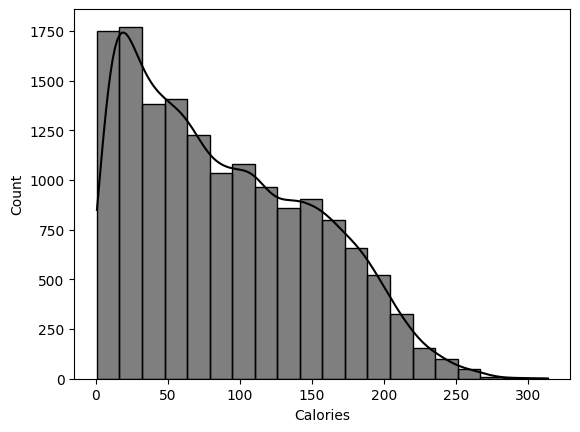

In [22]:
sns.histplot(df["Calories"], kde=True, bins=20, color="black")
plt.savefig("hist3.png")
plt.show()
#Right Skewed

### From skewed to Normal distribution👇

##### Applying Log Transformation👇

In [23]:
df["log_calories"] = np.log(df["Calories"])

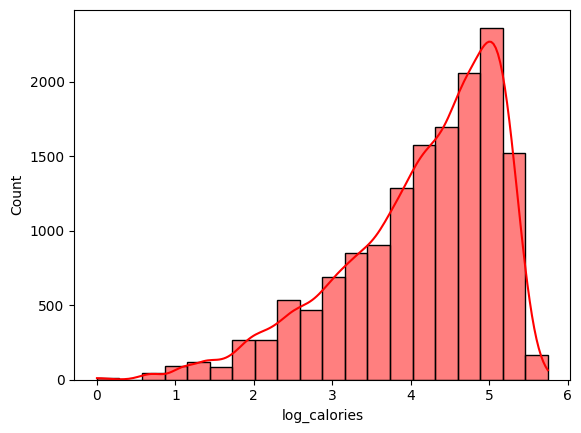

In [24]:
sns.histplot(data=df["log_calories"], bins=20, kde=True, color="red")
plt.show()

##### Applying Squared-Root Transformation👇

In [25]:
df["sqrt_calories"] = np.sqrt(df["Calories"])

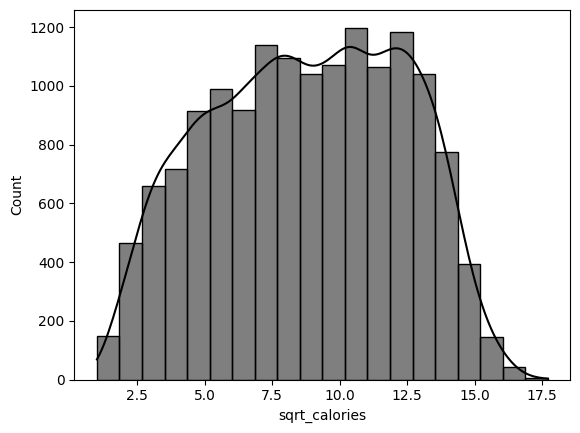

In [26]:
sns.histplot(data=df["sqrt_calories"], bins=20, kde=True, color="black")
plt.savefig("hist2.png")
plt.show()

## Correlation Metrics👇

In [27]:
corr_metrics = df[num_col].corr()
corr_metrics

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Age,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


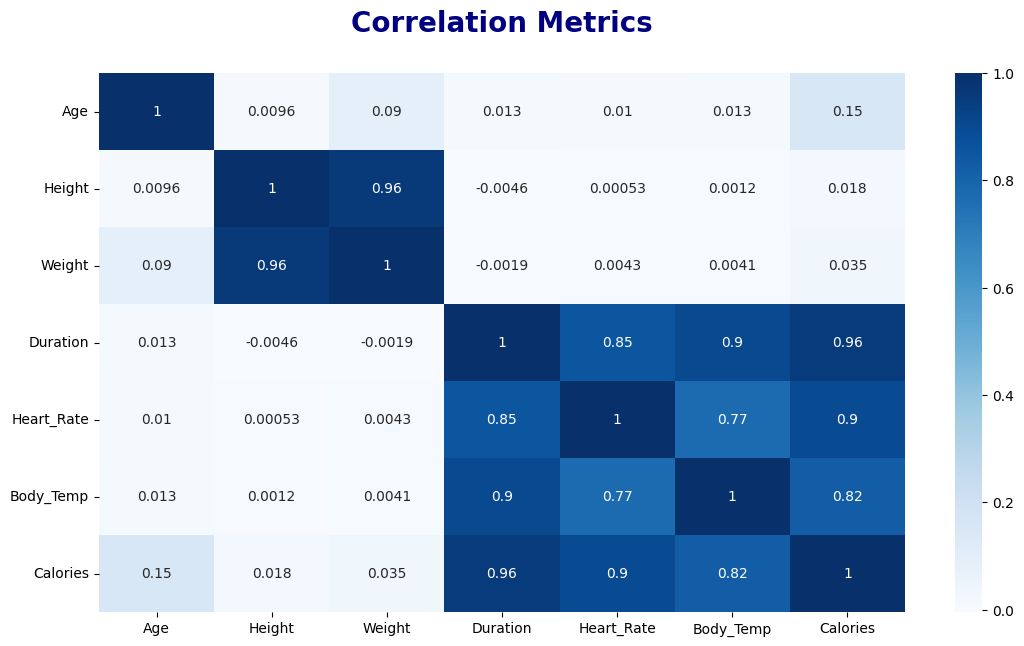

In [28]:
plt.figure(figsize=(13, 7))
sns.heatmap(data=corr_metrics, fmt='.2g', annot=True, cmap='Blues')
plt.title("Correlation Metrics", fontsize=20, color="navy", pad=30, fontweight="bold")
plt.show()

#### My Observation: Noticed a nearly perfect Correlation.

## Data Splitting👇

In [29]:
X = df.drop(columns=["Calories", "sqrt_calories", "log_calories"])
y = df["sqrt_calories"]

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [31]:
cat_col = X.select_dtypes(["object"]).columns
cat_col

Index(['Gender'], dtype='object')

In [32]:
num_col = X.select_dtypes(np.number).columns
num_col

Index(['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp'], dtype='object')

In [33]:
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_col)
])
# ("cat", OneHotEncoder(drop='first'), cat_col),

In [34]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp'], dtype='object'))])

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
pipeline = Pipeline([('preprocessor', preprocessor), ('model', RandomForestRegressor())]) #LinearRegression(n_jobs=-1)

In [38]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp'], dtype='object'))])),
                ('model', RandomForestRegressor())])

In [39]:
y_train_pred= pipeline.predict(X_train)
y_test_pred= pipeline.predict(X_test)

### Model Evaluation👇

In [40]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mse, test_mse

(0.006956884709304068, 0.047070399172141474)

#### My Discussion: 
##### Values for when the target variable is normally distributed;
**Train MSE = 0.145**

**Test MSE = 0.143**

##### Values for when the target variable was right-skewed;
**Train MSE = 127.44**

**Test MSE = 131.50**

MSE measures the average squared difference between actual and predicted values. A lower MSE indicates better model performance. The train and test MSE values are close, suggesting low overfitting (the model generalizes well).👆

#### Recommendation for futher Improvement:
- Feature engineering (adding relevant features)
- Hyperparameter tuning (optimizing model parameters)

In [41]:
train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)
train_score, test_score

(0.9994451630717541, 0.9963674946543584)

#### My Discussion: 
##### Values for when the target variable is normally Distributed;
**Train r2 = 0.9884**

**Test r2 = 0.9889**

##### Values for when the target variable was right-skewed;
**Train r2 = 0.9670**

**Test r2 = 0.9674**

r2 (coefficient of determination) measures how well the model explains the variance in the data.
An r2 of ~0.967 means 96.7% of the variance in the target variable is explained by the model, which is excellent.
The fact that the train and test r2 are very close suggests good generalization (no major overfitting or underfitting).

#### Recommendations:
- Since the model performs well, further improvements may not be necessary unless lower error is required.

In [42]:
# plt.figure(figsize=(7, 4))
# plt.plot(y_train_pred, y_train, color="navy")
# # plt.plot(y_test_pred, y_test, color="red")
# plt.xlabel("Predict")
# plt.ylabel("Actual")
# # plt.xticks(range(1, 11))
# plt.grid()
# plt.show()

          Actual  Predicted
3578    4.795832   4.547700
5608   11.135529  11.305680
10372   7.549834   7.670473
420     3.741657   3.502980
4448   11.180340  11.215963
7728    2.645751   2.633704
6428   12.649111  12.678558
1496   12.806248  12.537285
1047    7.681146   7.501218
11618  13.152946  13.322187
8720   12.845233  12.755320
856     5.830952   5.612051
14355  14.560220  14.940323
8400    2.645751   2.604193
8193   11.704700  11.588336
6216   13.638182  13.657756
3585    7.280110   7.342034
10023  10.954451  10.997696
14044   4.472136   4.417683
12965  14.628739  14.623129


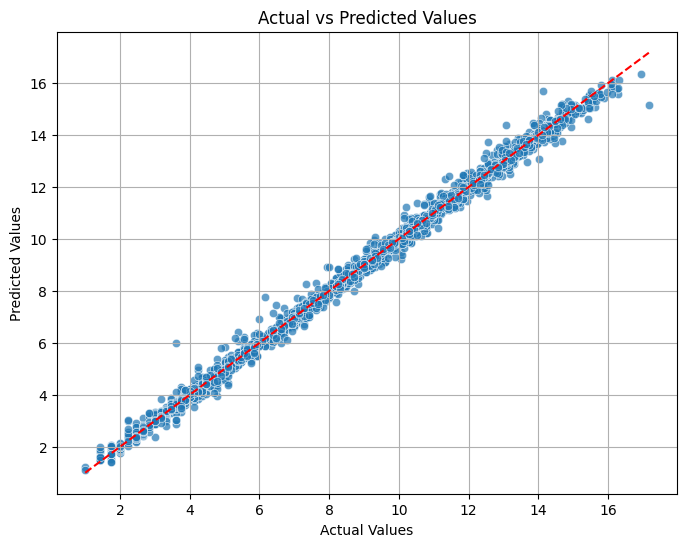

In [43]:
df_test = X_test.copy()
df_test['Actual'] = y_test
df_test['Predicted'] = y_test_pred


# Display comparison
print(df_test[['Actual', 'Predicted']].tail(20))


plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.7)  # Use seaborn for better visuals

# Add a perfect fit line (y = x)
min_val = min(min(y_test), min(y_test_pred))
max_val = max(max(y_test), max(y_test_pred))
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--")

# Labels and Title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.savefig("Actual-Predicted Values")
plt.grid(True)  # Add grid for better readability
plt.show()

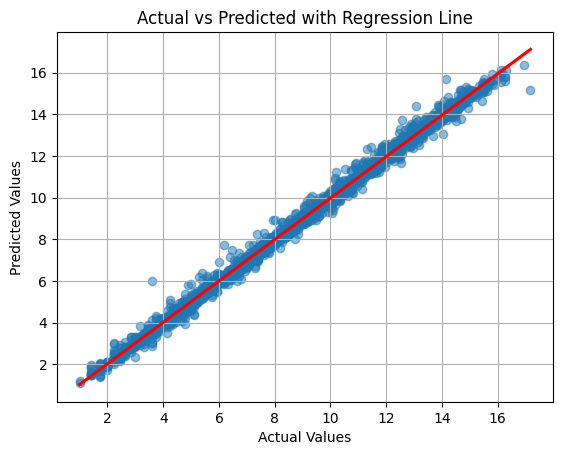

In [44]:
sns.regplot(x=y_test, y=y_test_pred, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted with Regression Line")
plt.grid(True)  # Add grid for better readability
plt.show()
plt.show()

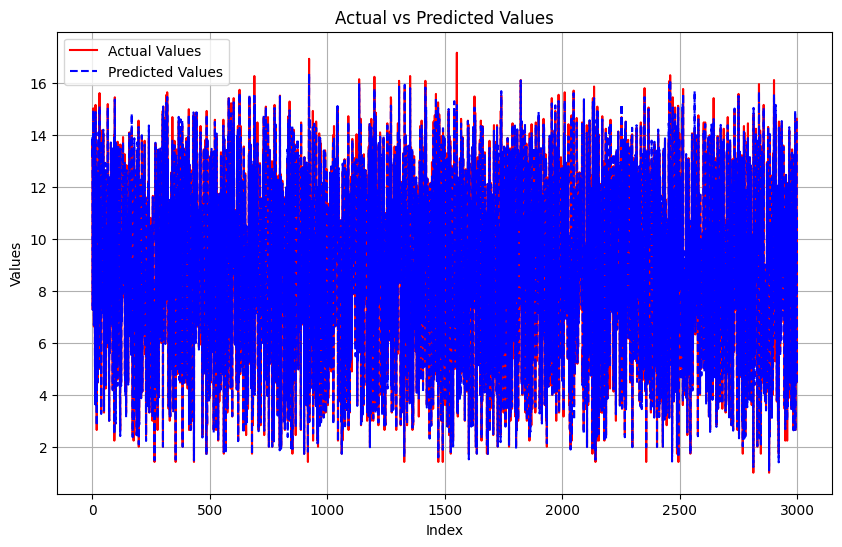

In [45]:
#Plot Actual vs. Predicted Values

plt.figure(figsize=(10, 6))

# Plot actual values in red
plt.plot(np.arange(len(y_test)), y_test, label="Actual Values", color="red", linestyle="-")

# Plot predicted values in blue
plt.plot(np.arange(len(y_test_pred)), y_test_pred, label="Predicted Values", color="blue", linestyle="--")

# Labels and Title
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Actual vs Predicted Values")
plt.legend()  # Show legend
plt.grid(True)  # Add grid for better readability

# Show the plot
plt.show()

In [46]:
model = pipeline.named_steps['model']  # Get the trained model
feature_importance = model.feature_importances_

In [47]:
feature_importance

array([1.85149788e-02, 1.26607663e-03, 5.56503508e-03, 9.38457332e-01,
       3.55932630e-02, 6.03314880e-04])

In [48]:
# importance_df = pd.DataFrame({
#     "Features" : X_train.columns,
#     "Importance" : feature_importance
# }).sort_values("Importance", ascending=False)

In [49]:
transformed_feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
importance_df = pd.DataFrame({
    "Features": transformed_feature_names,
    "Importance": feature_importance
}).sort_values("Importance", ascending=False)


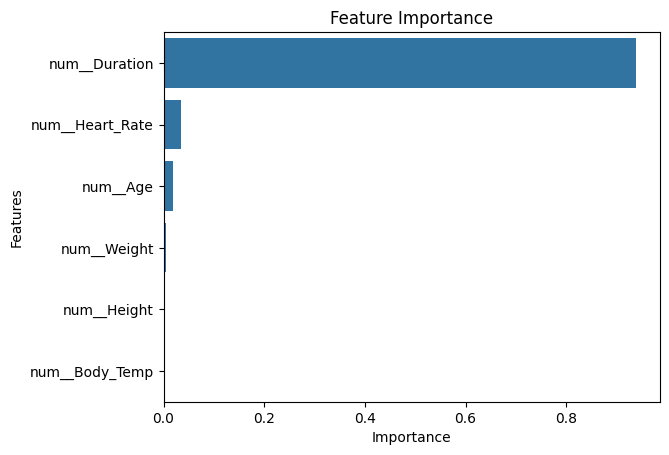

In [50]:
sns.barplot(data=importance_df, y="Features", x="Importance")
plt.title("Feature Importance")
plt.show()

In [51]:
import joblib

In [52]:
joblib.dump(pipeline, "Calories_prediction.pkl")

['Calories_prediction.pkl']

In [53]:
model = joblib.load("Calories_prediction.pkl")
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp'], dtype='object'))])),
                ('model', RandomForestRegressor())])

### Testing the Model

In [54]:
df.head(2)

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Age Category,Weight Category,log_calories,sqrt_calories
0,male,68,190,94,29,105,40.8,231,Aged,Weight Loss,5.442418,15.198684
1,female,20,166,60,14,94,40.3,66,Young Adult,Weight Gain,4.189655,8.124038


In [73]:
features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']
values = [20, 166, 60, 14, 94, 40.3]

In [74]:
values_arr = np.asarray(values)
values_arr

array([ 20. , 166. ,  60. ,  14. ,  94. ,  40.3])

In [75]:
values_arr = values_arr.reshape(1, -1)
values_arr

array([[ 20. , 166. ,  60. ,  14. ,  94. ,  40.3]])

In [76]:
testing = pd.DataFrame(values_arr, columns=features)
testing

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,20.0,166.0,60.0,14.0,94.0,40.3


In [77]:
pred = model.predict(testing)
prediction = pred[0]
result = prediction**2
result

np.float64(66.05961035756614)